# EDA of Heart Failure Data

Joel, Yaniv, Jeff<br>
Merck Challenge - Project 2<br>
Rutgers MSDS<br>
2/4/21<br>

Items to Check for EDA:  
1. Data loading and checking  
2a. Numerical summaries  
2b. Graphical summaries  
3. Extract important variable(s) and analyze them  
3a. Check for outliers and missing data  
(Note: Did not include a on outliers (yet), as should determine the threshold of removing outliers first. I would suggest checking the jackknife residuals (refer to HW #6 from reg & TS))(EDIT: might be different for GLMs...)  
3b. Develop and test simple models  
3c. Test model assumptions

Q: How much EDA should we do? (e.g. doing summaries of a few vs all variables, using some vs all of Yaniv's EDA code, etc.)

In [1]:
### Preliminaries
import pandas as pd # essential for data analysis
import numpy as np # gives tools for working with arrays
import matplotlib.pyplot as plt # useful for plots in general
import seaborn as sns # needed for histograms
import pylab as pyl #for generating plots: show()
import statsmodels.api as sm  #to use the Logit()

In [2]:
# Loading and Checking Data
data = pd.read_csv("/Users/yanivbronshtein/Downloads/heart_failure_clinical_records_dataset.csv")  # type and enter pwd and see if dataset is in same directory
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
data.shape # 299 rows, 13 cols

(299, 13)

In [5]:
data.std()

age                            11.894809
anaemia                         0.496107
creatinine_phosphokinase      970.287881
diabetes                        0.494067
ejection_fraction              11.834841
high_blood_pressure             0.478136
platelets                   97804.236869
serum_creatinine                1.034510
serum_sodium                    4.412477
sex                             0.478136
smoking                         0.467670
time                           77.614208
DEATH_EVENT                     0.467670
dtype: float64

In [6]:
data.info() # info about each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.isnull().any() # check if any missing data
# Q: Which variable(s) is dtype referring to?

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [8]:
## Correlation matrix
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [9]:
var = 'DEATH_EVENT' # defining and checking descriptive stats of variable of interest
series = data[var]

In [10]:
print("Mean: {}".format(series.mean()))
print("Stdev: {}".format(series.std()))
print("Min: {}".format(series.min()))
print("Max: {}".format(series.max()))
print("Median: {}".format(series.median()))
print("Mode: {}".format(series.mode()))
print("Skew: {}".format(series.skew()))
print("Kurtosis: {}".format(series.kurtosis()))

Mean: 0.3210702341137124
Stdev: 0.4676704280567721
Min: 0
Max: 1
Median: 0.0
Mode: 0    0
dtype: int64
Skew: 0.7703488154389491
Kurtosis: -1.4160799150023284


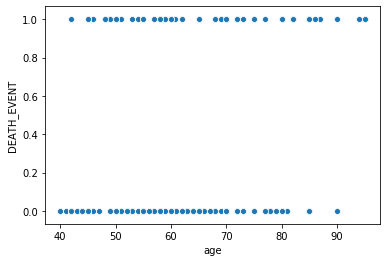

In [11]:
### Graphical Summaries
## Scatterplots
sns.scatterplot(x = "age", y = "DEATH_EVENT", data = data)

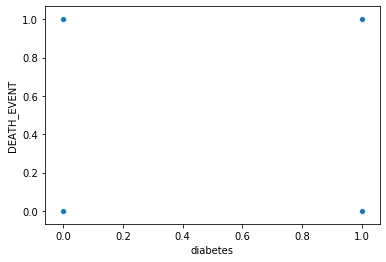

In [12]:
sns.scatterplot(x = "diabetes", y = "DEATH_EVENT", data = data)

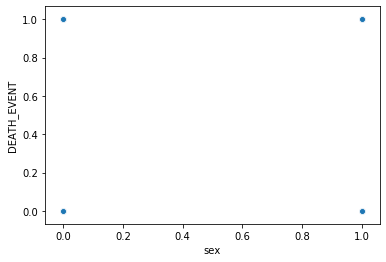

In [13]:
sns.scatterplot(x = "sex", y = "DEATH_EVENT", data = data)

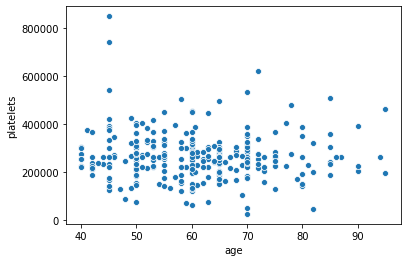

In [14]:
sns.scatterplot(x = "age", y = "platelets", data = data) # used for testing continous DV

In [15]:
# sns.pairplot(data = data)
# Q: How to zoom in on particular plots?

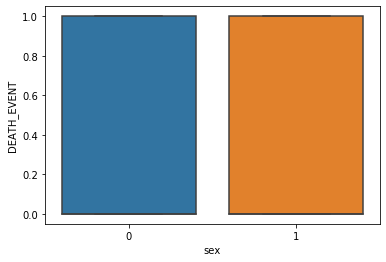

In [16]:
## Boxplots
sns.boxplot(x='sex', y='DEATH_EVENT', data= data)

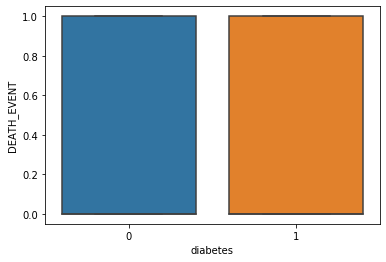

In [17]:
sns.boxplot(x='diabetes', y='DEATH_EVENT', data= data)

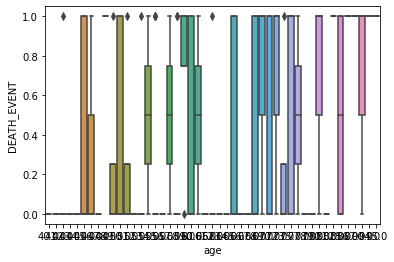

In [18]:
sns.boxplot(x='age', y='DEATH_EVENT', data= data)

In [19]:
# Get variable names

def getvar(x):
    for i in x:
        print(i)

In [20]:
getvar(data)

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


40.0
95.0


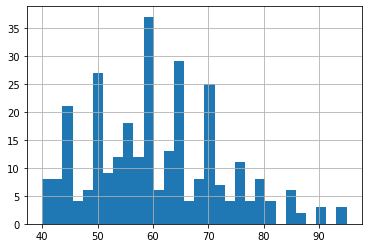

In [21]:
## Histograms
# Note: See cell 22 in Yaniv's EDA notebook

print(min(data['age']))
print(max(data['age'])) # used to check if increasing or decreasing bins is needed
data['age'].hist(bins=30)

0
1


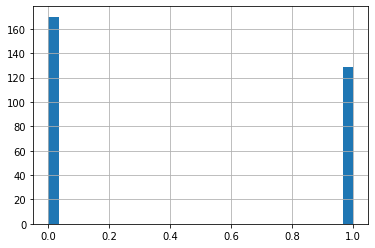

In [22]:
print(min(data['anaemia']))
print(max(data['anaemia'])) # used to check if increasing or decreasing bins is needed
data['anaemia'].hist(bins=30)

23
7861


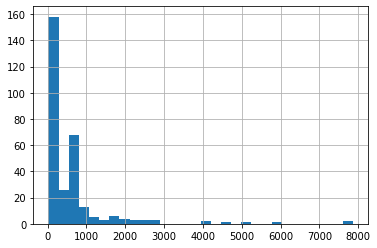

In [23]:
print(min(data['creatinine_phosphokinase']))
print(max(data['creatinine_phosphokinase'])) # used to check if increasing or decreasing bins is needed
data['creatinine_phosphokinase'].hist(bins=30)

0
1


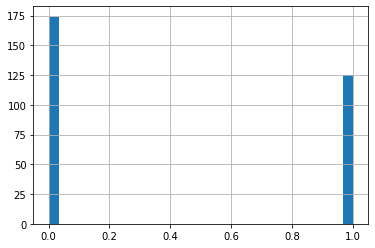

In [24]:
print(min(data['diabetes']))
print(max(data['diabetes'])) # used to check if increasing or decreasing bins is needed
data['diabetes'].hist(bins=30)

14
80


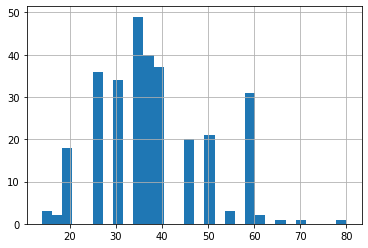

In [25]:
print(min(data['ejection_fraction']))
print(max(data['ejection_fraction'])) # used to check if increasing or decreasing bins is needed
data['ejection_fraction'].hist(bins=30)

0
1


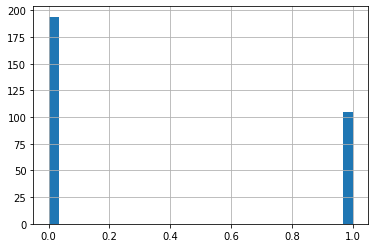

In [26]:
print(min(data['high_blood_pressure']))
print(max(data['high_blood_pressure'])) # used to check if increasing or decreasing bins is needed
data['high_blood_pressure'].hist(bins=30)

25100.0
850000.0


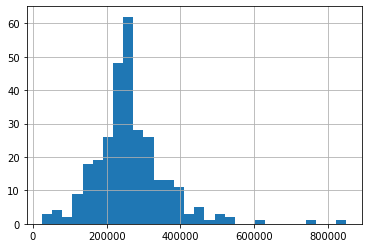

In [27]:
print(min(data['platelets']))
print(max(data['platelets'])) # used to check if increasing or decreasing bins is needed
data['platelets'].hist(bins=30)

0.5
9.4


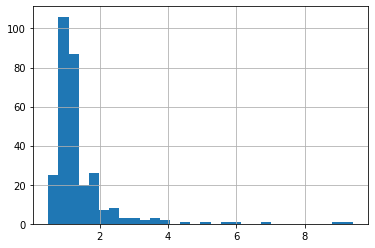

In [28]:
print(min(data['serum_creatinine']))
print(max(data['serum_creatinine'])) # used to check if increasing or decreasing bins is needed
data['serum_creatinine'].hist(bins=30)

113
148


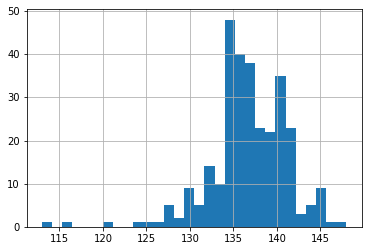

In [29]:
print(min(data['serum_sodium']))
print(max(data['serum_sodium'])) # used to check if increasing or decreasing bins is needed
data['serum_sodium'].hist(bins=30)

0
1


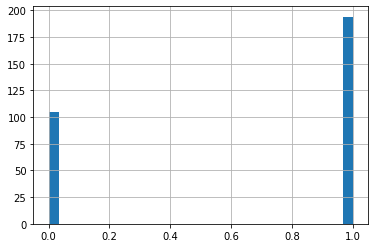

In [30]:
print(min(data['sex']))
print(max(data['sex'])) # used to check if increasing or decreasing bins is needed
data['sex'].hist(bins=30)

0
1


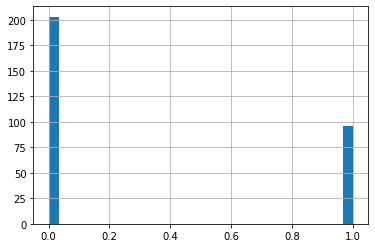

In [31]:
print(min(data['smoking']))
print(max(data['smoking'])) # used to check if increasing or decreasing bins is needed
data['smoking'].hist(bins=30)

4
285


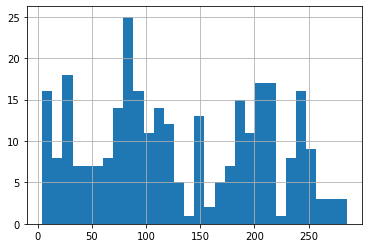

In [32]:
print(min(data['time']))
print(max(data['time'])) # used to check if increasing or decreasing bins is needed
data['time'].hist(bins=30)

0
1


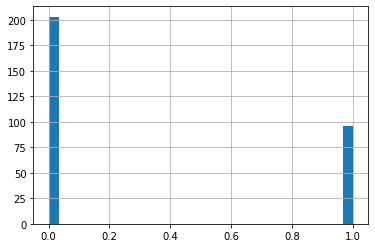

In [33]:
print(min(data['DEATH_EVENT']))
print(max(data['DEATH_EVENT'])) # used to check if increasing or decreasing bins is needed
data['DEATH_EVENT'].hist(bins=30)

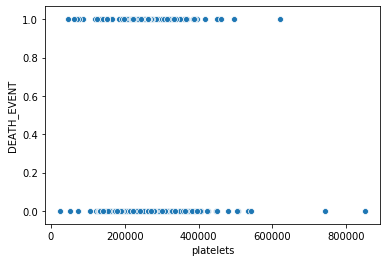

In [34]:
## Outliers
# Note: Can do it qualitatively or quantitatively... will be doing the former here. However, we can take the latter
# approach if we so desired: https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32
# Q: Should use Judgement vs. IQR/Z-scores?

# Ex # 1: platelets variable
# Before
sns.scatterplot(x='platelets', y = 'DEATH_EVENT', data=data)

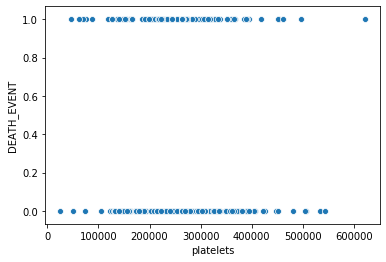

In [35]:
# After
# See cell 32 in Yaniv's EDA notebook

data = data[data['platelets'] <= 650000]
sns.scatterplot(x='platelets', y = 'DEATH_EVENT', data=data)

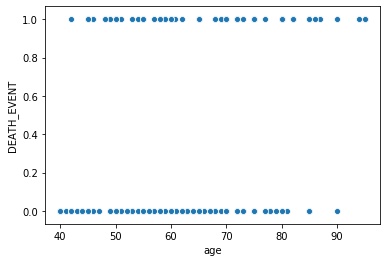

In [36]:
# Ex #2: age variable
# Note: don't think we should exclude age, as study wanted to focus on all age groups, but just to see

# Before
sns.scatterplot(x='age', y = 'DEATH_EVENT', data=data)

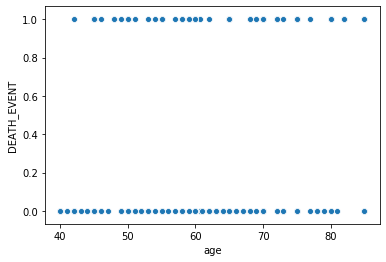

In [37]:
# After

data = data[data['age'] <= 85]
sns.scatterplot(x='age', y = 'DEATH_EVENT', data=data)

# Q: Which variables to ultimately include in predictive models? Important to know since they may need to be adjusted for outliers

In [38]:
## Logistic Regression
## NOTE: As DEATH_EVENT is a binary variable, we must do logit; linear regression will not work
## Reference: https://gist.github.com/reenashaw/9de3608fa94f1a9ade0e19135afac70a

data['int']=1 #explicitly create a placeholder for y-intercept: b0
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,int
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1


In [39]:
IV = ['age','sex','diabetes']
model= sm.Logit(data['DEATH_EVENT'], data[IV])
answer= model.fit()

Optimization terminated successfully.
         Current function value: 0.628352
         Iterations 5


In [40]:
answer.summary() #summarize the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  289
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                            2
Date:                Sun, 07 Mar 2021   Pseudo R-squ.:                -0.01764
Time:                        21:22:37   Log-Likelihood:                -181.59
converged:                       True   LL-Null:                       -178.45
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0074      0.004     -1.889      0.059      -0.015       0.000
sex           -0.3256      0.260     -1.253      0.210      -0.835       0.183
diabetes      -0.1703      0.253     -0.674      0.500      -0.666       0.325
==============================================================================
"""

# (K-Fold) Cross-Validation Logistic Regression

Note: The following functions/commands are based on those from Yaniv's Logistic Regression Notebook

In [41]:
# Before splitting data

print(data.shape)
data.head()

(289, 14)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,int
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1


In [42]:
# After splitting data and creating training data

train_df = data.sample(int(data.shape[0] * 0.8))
print(train_df.shape)
train_df.head()

(231, 14)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,int
57,60.0,1,607,0,40,0,216000.00,0.60,138,1,1,54,0,1
24,75.0,0,582,1,30,1,263358.03,1.83,134,0,0,23,1,1
250,50.0,0,2522,0,30,1,404000.00,0.50,139,0,0,214,0,1
128,61.0,0,248,0,30,1,267000.00,0.70,136,1,1,104,0,1
199,60.0,0,1211,1,35,0,263358.03,1.80,113,1,1,186,0,1


In [43]:
testing_rows = [idx for idx in data.index if idx not in train_df.index]
len(testing_rows)

58

In [44]:
# Creating test data

test_df = data.iloc[testing_rows, :]
print(test_df.shape)
test_df.head()

IndexError: positional indexers are out-of-bounds

In [ ]:
# Building logistic regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
def getvar(x):
    for i in x:
        print(i)

print(getvar(data))

In [ ]:
# inlcude ALL numerical variables (thankfully, this data is clean...)

train = train_df[['age','anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 
                  'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 
                  'sex', 'smoking', 'time', 'DEATH_EVENT']]
train.head()

In [ ]:
# create x and y subsets of train and train data
# note: DEATH_EVENT = response variable (y); dropped in training set?

X_train, X_test, y_train, y_test = train_test_split(train.drop('DEATH_EVENT', axis=1), 
                                                    train['DEATH_EVENT'], test_size = 0.20, 
                                                    random_state=101)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions)*100)     # convert to %

# Q: Should also produce smaller model (e.g. model with fewer variables), to see if this is improved model?

# Random Forest Classifier

**Step 1: Import libraries**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

**Step 2: Create the set`X` for the feature set and `Y` for the treatment variable from the dataframe** 

In [ ]:
X = data.drop('DEATH_EVENT', axis=1)

In [ ]:
X.head()

In [ ]:
Y = data['DEATH_EVENT']

In [ ]:
Y.head()

**Create function to perform the following:
a)train, test, split the feature set and treatment set <br>
b). Train a Random Forest Model with 100 trees and criterion entropy<br>
c). Fit the Model<br>
d). Generate the Predictions<br>
e). Create the necessary metric reports**<br>

In [ ]:
import random #Necessary so that the data is split according to a random metric
import collections

In [ ]:
def random_forest_ml():
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = random.randint(1, 1000))
    model = RandomForestClassifier(criterion='entropy')
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    collections_count_predictions = collections.Counter(predictions)
    collections_count_Y = collections.Counter(Y_test)
    print("Original Data counts prior to train test split:")
    print("Died", collections_count_Y[1], "Survived", collections_count_Y[0])
    print("Predictions counts:")
    print("Died", collections_count_predictions[1], "Survived", collections_count_predictions[0])
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print(classification_report(Y_test, predictions)) #todo: convert to dataframe
    

**Create a function to Perform K fold cross validation**

In [ ]:
def kfold(k):
    for i in range(1,k+1):
        print("Test number:", i)
        random_forest_ml()

In [ ]:
kfold(10)

# Lime